In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


In [19]:
df = pd.read_csv('data_따릉/2018-2021년_2_자치구별_따릉이_이용건수.csv')
df.drop(columns='Unnamed: 0', inplace=True)

df['일시']=pd.to_datetime(df['일시']) # 날짜형식으로 변경
df['year'] = df.일시.apply(lambda x : x.year)
df['month'] = df.일시.apply(lambda x : x.month)
df['day'] = df.일시.apply(lambda x : x.day)

In [20]:
test5.columns

NameError: name 'test5' is not defined

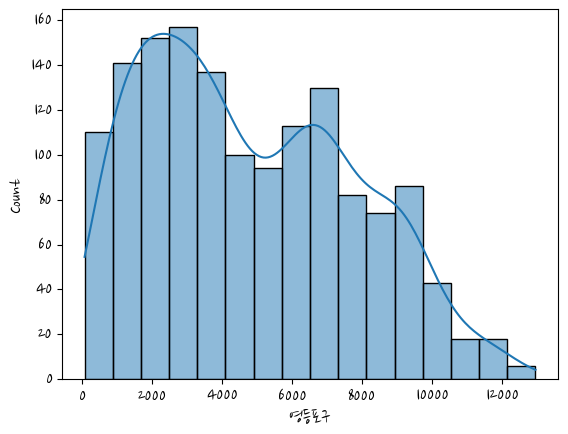

In [21]:
sns.histplot(df['영등포구'], kde=True) # 정규분포 확인
test5 = df[['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
      '요일', '계절', 'year', 'month',
       'day', '영등포구']] #확인할 컬럼 추출

In [ ]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    print(f'R2: {r2_score(y_test, pred)}')
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
        
    return rmses

In [ ]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

In [ ]:
y_train

In [ ]:
# 계산처리 안할거 문자로 바꾸기
test5[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day']].astype('str')
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)
# 왜곡도 1 이상은 로그로 변환
test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index])

In [ ]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])

In [ ]:
sns.histplot(test5['영등포구'], kde=True)

In [ ]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [ ]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, np.expm1(y_train))
pred = lr_reg.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), pred)
rmse = np.sqrt(mse)
print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(np.expm1(y_test), pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred =ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
pred =lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

In [ ]:
np.expm1(0.26877252422471865)

In [ ]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}')

# 실제 2022년꺼 예측해보기

In [ ]:
tt18 = df[df['year']==2018]
tt19 = df[df['year']==2019]
tt20 = df[df['year']==2020]
tt21 = df[df['year']==2021]

In [ ]:
 tt21 = tt21[tt21['일시'] < '2021-07-01']

In [ ]:
tt21 = tt21[['month', 'day', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절', '영등포구']]

In [ ]:
tt21[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= tt21[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [ ]:
tt21d = pd.get_dummies(tt21)

In [ ]:
tt21d.shape

In [ ]:
tt21d.columns
# ['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
#        '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
#        '평균중하층운량', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', 'year_2022', 'month_1',
#        'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'day_1',
#        'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
#        'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22',
#        'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
#        'day_3', 'day_30', 'day_31', 'day_4', 'day_5', 'day_6', 'day_7',
#        'day_8', 'day_9', '강수여부_0.0', '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0',
#        '요일_1', '요일_2', '요일_3', '요일_4', '요일_5', '요일_6', '계절_1', '계절_2', '계절_4']

In [ ]:
X = tt21d.drop(columns=['영등포구'])
y = tt21d['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

In [ ]:
# 모델 확인

pred1 = lr_reg.predict(ttd)
# mse = mean_squared_error(np.expm1(y_test), pred)
# rmse = np.sqrt(mse)
# print(f'lr_reg MSE:  {mse}, RMSE: {rmse}, R2: {r2_score(np.expm1(y_test), pred)}')

pred2 =ridge_reg.predict(ttd)
# mse = mean_squared_error(y_test, pred)
# rmse = np.sqrt(mse)
# print(f'ridge_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

pred3 =lasso_reg.predict(ttd)
# mse = mean_squared_error(y_test, pred)
# rmse = np.sqrt(mse)
# print(f'lasso_reg MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

In [ ]:
ttd.drop(columns='year_2022', inplace=True)

In [ ]:
tt21d.columns

In [ ]:
dat= pd.read_csv('답지.csv', index_col=0)

In [ ]:
X_train = tt21d.drop(columns=['영등포구'])
X_test = ttd
y_train = dd
y_test = yy

In [ ]:
dd

In [ ]:
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

In [ ]:
yy= dat['영등포구']

In [ ]:
yy.shape

In [ ]:
pred1.shape

In [ ]:
for solve, predd in zip(yy, pred1):
    print(f'{solve}, {predd}')

In [ ]:
tt20

In [ ]:
tt= pd.read_csv('data_따릉/2022_컬럼_전처리.csv')

In [ ]:
tt.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
tt['일시']= pd.to_datetime(tt['일시'])

In [ ]:
tt = tt[tt['일시'] < '2022-07-01']

In [ ]:
tt['year'] = tt.일시.apply(lambda x : x.year)
tt['month'] = tt.일시.apply(lambda x : x.month)
tt['day'] = tt.일시.apply(lambda x : x.day)

In [ ]:
tt= tt[['year', 'month', 'day', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절']]

In [ ]:
tt[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day',]]= tt[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day']].astype('str')

In [ ]:
ttd = pd.get_dummies(tt)

In [ ]:
ttd.columns

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(9, 9))
corr = test5.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)

In [ ]:
corr

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8), ncols = 2, nrows = 1)
mv_features = ['계절', '일강수량']
for i, feature in enumerate(mv_features):
    sns.regplot(x=feature, y='영등포구', data = test5, ax = axs[i])

## 로지스틱 회귀해보기~

In [ ]:
def get_top_error_data(y_test,pred,n_top=5):
    result_df = pd.DataFrame(y_test.values, columns=['real'])
    result_df['pred']=np.round(pred)
    result_df['diff']= np.abs(result_df['real']- result_df['pred'])
    print(result_df['diff'].mean())
    print(result_df)

In [ ]:
test5

In [ ]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [ ]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

In [ ]:
get_top_error_data(y_test,lr_pred)

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=156, max_depth=8)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


In [ ]:
for solve, predd in zip(y_test, pred):
    print(f'{solve}, {predd}')

In [ ]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [ ]:
rf_reg = RandomForestRegressor(random_state=156, max_depth=8)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


In [ ]:
for solve, predd in zip(y_test, pred):
    print(f'{solve}, {predd}')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
 'max_depth': [16,17,18,19,20],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf':[2,3,4,5,6],
}

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100,random_state=156, n_jobs= -1)
grid_cv = GridSearchCV(rf_reg, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=500,random_state=156, max_depth=19, min_samples_leaf=2, min_samples_split=2,n_jobs= -1)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')


In [ ]:
inf = rf_reg.feature_importances_
fff = pd.Series(inf, index = X_train.columns)
ft20 = fff.sort_values(ascending = False)[:20]

sns.barplot(x = ft20, y = ft20.index)
plt.show()

In [ ]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

### GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [ ]:
%%time

gb_ref = GradientBoostingRegressor(random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

In [ ]:
%%time
grid_cv = GridSearchCV(gb_ref, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

In [ ]:
gb_ref = GradientBoostingRegressor(n_estimators=200, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

### LightGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

In [ ]:
from lightgbm import plot_importance

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

In [ ]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

In [ ]:
from hyperopt import hp

In [ ]:
lgb_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}


<AxesSubplot:>

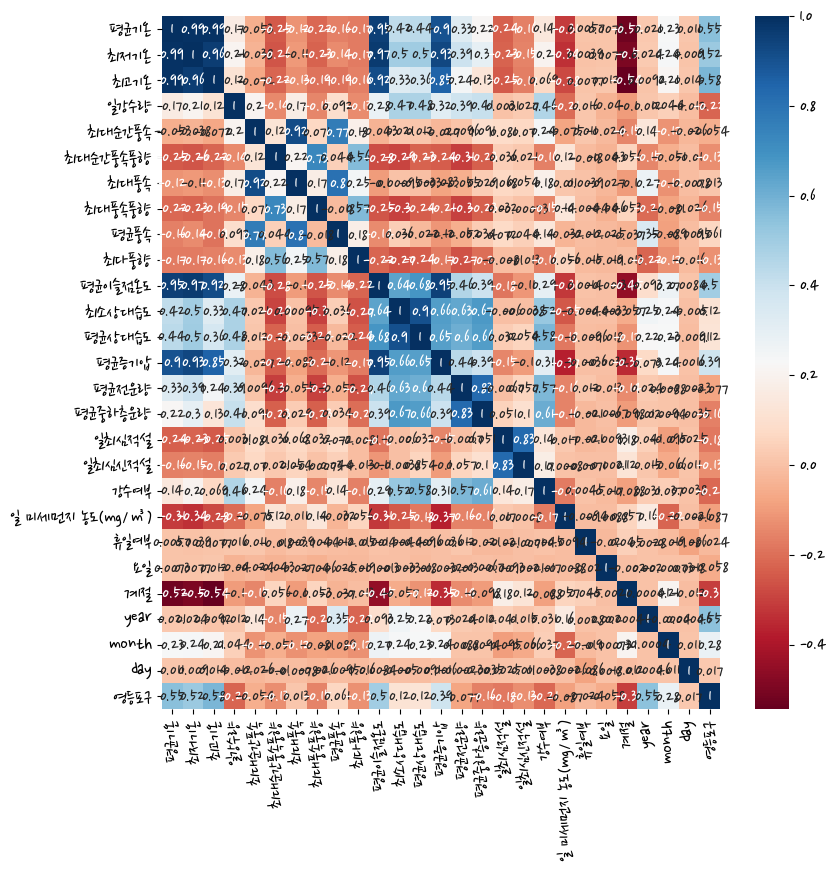

In [134]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(9, 9))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)

In [23]:
corr_df = df.corr()
s = corr_df.unstack()
df = pd.DataFrame(s[s<1].sort_values(ascending=False), columns=['corr'])
dff = df.style.background_gradient(cmap='viridis')
dff.columns

,,corr
평균기온,최고기온,0.989298
최고기온,평균기온,0.989298
평균기온,최저기온,0.989262
최저기온,평균기온,0.989262
평균이슬점온도,최저기온,0.967202
최저기온,평균이슬점온도,0.967202
최고기온,최저기온,0.961977
최저기온,최고기온,0.961977
평균기온,평균이슬점온도,0.953476
평균이슬점온도,평균기온,0.953476


,,corr
평균기온,최고기온,0.989298
최고기온,평균기온,0.989298
평균기온,최저기온,0.989262
최저기온,평균기온,0.989262
평균이슬점온도,최저기온,0.967202
...,...,...
최저기온,계절,-0.497478
계절,평균기온,-0.524868
평균기온,계절,-0.524868
계절,최고기온,-0.544007


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('data_따릉/영등포구 취합.csv')

# 1. 기온 part
columns = ['평균기온', '최저기온', '최고기온', '평균이슬점온도']
df_temparature = pd.DataFrame(df, columns = columns)
df_temparature['영등포구'] = df['영등포구']
df_temparature

temparature_scaled = StandardScaler().fit_transform(df_temparature.iloc[:,:-1])
temparature_scaled

pca = PCA(n_components = 1)

pca.fit(temparature_scaled)
temparature_pca = pca.transform(temparature_scaled)
temparature_pca.shape

pca_columns = ['기온']
df_temparature_pca = pd.DataFrame(temparature_pca, columns = pca_columns)
df_temparature_pca['영등포구'] = df_temparature['영등포구']
df_temparature_pca,df_temparature

df_temparature_pca

print(pca.explained_variance_ratio_)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [10]:
rcf = RandomForestRegressor(random_state=156)
scores = cross_val_score(rcf, df_temparature, df['영등포구'], cv = 3)

print('기온 원본 데이터 교차 검증 개별 정확도:' ,scores)
print('기온 원본 데이터 평균 정확도:' ,np.mean(scores))

기온 원본 데이터 교차 검증 개별 정확도: [0.99990591 0.99996798 0.95568335]
기온 원본 데이터 평균 정확도: 0.9851857491563661


In [11]:
# 2. 기온 part
columns = ['평균증기압']
df_pressure = pd.DataFrame(df, columns = columns)
df_pressure['영등포구'] = df['영등포구']
df_pressure,df_temparature_pca,df_temparature

,평균증기압,영등포구
0,2.1,421.0
1,2.2,820.0
2,1.8,839.0
3,1.8,749.0
4,2.4,878.0
...,...,...
1456,2.2,3517.0
1457,3.3,4214.0
1458,4.6,4126.0
1459,2.2,3883.0


In [12]:
pressure_scaled = StandardScaler().fit_transform(df_pressure.iloc[:,:-1])
pressure_scaled

array([[-1.15855873],
       [-1.14648215],
       [-1.19478849],
       ...,
       [-0.85664408],
       [-1.14648215],
       [-1.25517142]])

In [13]:
pca = PCA(n_components = 1)

pca.fit(pressure_scaled)
pressure_pca = pca.transform(pressure_scaled)
pressure_pca.shape

(1461, 1)

In [67]:
pca_columns = ['기압']
df_pressure_pca = pd.DataFrame(pressure_pca, columns = pca_columns)
df_pressure_pca['영등포구'] = df_pressure['영등포구']
df_pressure_pca

,기압,영등포구
0,-1.158559,421.0
1,-1.146482,820.0
2,-1.194788,839.0
3,-1.194788,749.0
4,-1.122329,878.0
...,...,...
1456,-1.146482,3517.0
1457,-1.013640,4214.0
1458,-0.856644,4126.0
1459,-1.146482,3883.0


In [62]:
all = all.merge(df_windspeed_pca, on= '영등포구', axis = 1)
all

TypeError: merge() got an unexpected keyword argument 'axis'

In [15]:
print(pca.explained_variance_ratio_)

[1.]


In [16]:
rcf = RandomForestRegressor(random_state=156)
scores = cross_val_score(rcf, df_pressure, df['영등포구'], cv = 3)

print('기압 원본 데이터 교차 검증 개별 정확도:' ,scores)
print('기압 원본 데이터 평균 정확도:' ,np.mean(scores))

기압 원본 데이터 교차 검증 개별 정확도: [0.99992893 0.99997615 0.95695793]
기압 원본 데이터 평균 정확도: 0.9856210027178515


In [17]:
# 3. 풍속 part
columns = ['최대순간풍속','최대풍속']
df_windspeed = pd.DataFrame(df, columns = columns)
df_windspeed['영등포구'] = df['영등포구']
df_windspeed

,최대순간풍속,최대풍속,영등포구
0,7.0,3.8,421.0
1,8.5,4.9,820.0
2,6.6,3.5,839.0
3,5.8,3.5,749.0
4,8.0,3.6,878.0
...,...,...,...
1456,5.5,3.1,3517.0
1457,4.9,3.1,4214.0
1458,10.8,5.9,4126.0
1459,12.3,6.6,3883.0


In [18]:
windspeed_scaled = StandardScaler().fit_transform(df_windspeed.iloc[:,:-1])
windspeed_scaled

array([[-0.51623692, -0.53648561],
       [ 0.09635416,  0.3353781 ],
       [-0.67959455, -0.77426662],
       ...,
       [ 1.0356605 ,  1.12798147],
       [ 1.64825158,  1.68280383],
       [ 1.48489396,  0.73167978]])

In [19]:
pca = PCA(n_components = 1)

pca.fit(windspeed_scaled)
windspeed_pca = pca.transform(windspeed_scaled)
windspeed_pca.shape

(1461, 1)

In [20]:
pca_columns = ['풍속']
df_windspeed_pca = pd.DataFrame(windspeed_pca, columns = pca_columns)
df_windspeed_pca['영등포구'] = df_windspeed['영등포구']
df_windspeed_pca

,풍속,영등포구
0,-0.744387,421.0
1,0.305281,820.0
2,-1.028035,839.0
3,-1.259058,749.0
4,-0.567700,878.0
...,...,...
1456,-1.569873,3517.0
1457,-1.743140,4214.0
1458,1.529926,4126.0
1459,2.355412,3883.0


In [21]:
print(pca.explained_variance_ratio_)

[0.9583097]


In [22]:
rcf = RandomForestRegressor(random_state=156)
scores = cross_val_score(rcf, df_windspeed, df['영등포구'], cv = 3)

print('풍속 원본 데이터 교차 검증 개별 정확도:' ,scores)
print('풍속 원본 데이터 평균 정확도:' ,np.mean(scores))

풍속 원본 데이터 교차 검증 개별 정확도: [0.99991991 0.99997589 0.95287859]
풍속 원본 데이터 평균 정확도: 0.9842581287169491


In [23]:
# 4. 습도 part
columns = ['최소상대습도','평균상대습도']
df_humidity = pd.DataFrame(df, columns = columns)
df_humidity['영등포구'] = df['영등포구']
df_humidity

,최소상대습도,평균상대습도,영등포구
0,19,39.1,421.0
1,19,42.0,820.0
2,28,42.3,839.0
3,31,43.0,749.0
4,32,48.4,878.0
...,...,...,...
1456,38,60.9,3517.0
1457,57,73.8,4214.0
1458,50,72.9,4126.0
1459,34,48.5,3883.0


In [24]:
humidity_scaled = StandardScaler().fit_transform(df_humidity.iloc[:,:-1])
humidity_scaled

array([[-1.24418947, -1.40942252],
       [-1.24418947, -1.22079997],
       [-0.70132222, -1.2012873 ],
       ...,
       [ 0.6256866 ,  0.78900576],
       [-0.33941073, -0.7980253 ],
       [-0.82195939, -1.61755774]])

In [25]:
pca = PCA(n_components = 1)

pca.fit(humidity_scaled)
humidity_pca = pca.transform(humidity_scaled)
humidity_pca.shape

(1461, 1)

In [26]:
pca_columns = ['습도']
df_humidity_pca = pd.DataFrame(humidity_pca, columns = pca_columns)
df_humidity_pca['영등포구'] = df_humidity['영등포구']
df_humidity_pca

,습도,영등포구
0,-1.876387,421.0
1,-1.743011,820.0
2,-1.345348,839.0
3,-1.185199,749.0
4,-0.894191,878.0
...,...,...
1456,-0.063383,3517.0
1457,1.340293,4214.0
1458,1.000339,4126.0
1459,-0.804289,3883.0


In [47]:
all = all.merge(df_humidity_pca, on= '영등포구')

In [27]:
print(pca.explained_variance_ratio_)

[0.95237324]


In [28]:
rcf = RandomForestRegressor(random_state=156)
scores = cross_val_score(rcf, df_humidity, df['영등포구'], cv = 3)

print('습도 원본 데이터 교차 검증 개별 정확도:' ,scores)
print('습도 원본 데이터 평균 정확도:' ,np.mean(scores))

습도 원본 데이터 교차 검증 개별 정확도: [0.99989414 0.99997506 0.95549589]
습도 원본 데이터 평균 정확도: 0.9851216943505762


In [29]:
# 5. 운량 part
columns = ['평균전운량','평균중하층운량']
df_cloud = pd.DataFrame(df, columns = columns)
df_cloud['영등포구'] = df['영등포구']
df_cloud

,평균전운량,평균중하층운량,영등포구
0,1.0,0.9,421.0
1,2.3,0.0,820.0
2,3.6,0.0,839.0
3,6.5,2.9,749.0
4,3.6,0.8,878.0
...,...,...,...
1456,3.1,3.1,3517.0
1457,4.1,4.1,4214.0
1458,5.1,5.1,4126.0
1459,2.0,1.9,3883.0


In [30]:
cloud_scaled = StandardScaler().fit_transform(df_cloud.iloc[:,:-1])
cloud_scaled

array([[-1.26916724, -0.83941291],
       [-0.846475  , -1.18691748],
       [-0.42378275, -1.18691748],
       ...,
       [ 0.06393907,  0.78227511],
       [-0.94401936, -0.45329671],
       [-1.59431513, -1.18691748]])

In [31]:
pca = PCA(n_components = 1)

pca.fit(humidity_scaled)
cloud_pca = pca.transform(cloud_scaled)
cloud_pca.shape

(1461, 1)

In [32]:
pca_columns = ['운량']
df_humidity_pca = pd.DataFrame(humidity_pca, columns = pca_columns)
df_humidity_pca['영등포구'] = df_humidity['영등포구']
df_humidity_pca

,운량,영등포구
0,-1.876387,421.0
1,-1.743011,820.0
2,-1.345348,839.0
3,-1.185199,749.0
4,-0.894191,878.0
...,...,...
1456,-0.063383,3517.0
1457,1.340293,4214.0
1458,1.000339,4126.0
1459,-0.804289,3883.0


In [ ]:
all = all.merge(df_humidity_pca, on= '영등포구')

In [48]:
all


,기온,영등포구,기압,풍속_x,풍속_y,운량
0,2.849341,421.0,-1.158559,-0.744387,-0.744387,-1.876387
1,2.938423,820.0,-1.146482,0.305281,0.305281,-1.743011
2,3.383496,839.0,-1.194788,-1.028035,-1.028035,-1.345348
3,3.464808,749.0,-1.194788,-1.259058,-1.259058,-1.185199
4,3.001599,878.0,-1.122329,-0.567700,-0.567700,-0.894191
...,...,...,...,...,...,...
6046,4.719180,1129.0,-1.279325,0.393624,0.393624,-1.162203
6047,3.133569,4214.0,-1.013640,-1.743140,-1.743140,1.340293
6048,2.202502,4126.0,-0.856644,1.529926,1.529926,1.000339
6049,3.200306,3883.0,-1.146482,2.355412,2.355412,-0.804289


In [33]:
print(pca.explained_variance_ratio_)

[0.95237324]


In [34]:
rcf = RandomForestRegressor(random_state=156)
scores = cross_val_score(rcf, df_cloud, df['영등포구'], cv = 3)

print('운량 원본 데이터 교차 검증 개별 정확도:' ,scores)
print('운량 원본 데이터 평균 정확도:' ,np.mean(scores))

운량 원본 데이터 교차 검증 개별 정확도: [0.99991528 0.99997744 0.95602125]
운량 원본 데이터 평균 정확도: 0.9853046557423909


In [54]:
all = all.merge(test5, on= '영등포구')

In [51]:
all.drop(columns='풍속_y', inplace=True)

In [53]:
all.columns = ['기온', '영등포구', '기압', '풍속', '운량']

In [56]:
all.columns

Index(['기온', '영등포구', '기압', '풍속', '운량', '평균기온', '최저기온', '최고기온', '일강수량',
       '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도',
       '최소상대습도', '평균상대습도', '평균증기압', '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설',
       '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절', 'year', 'month', 'day'],
      dtype='object')

In [57]:
all.drop(columns=['평균기온', '최저기온', '최고기온','평균이슬점온도','평균증기압','최대순간풍속','최대풍속','최소상대습도', '평균상대습도', '평균전운량', '평균중하층운량'], inplace=True)

In [59]:
all.to_csv('최종_데이터.csv', index=False)

In [61]:
test5.head(50)

,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,최다풍향,...,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,year,month,day,영등포구
0,-1.3,-5.1,3.8,0.0,7.0,320,3.8,290,1.4,290,...,0.0,0.0,38.0,1,0,4,2018,1,1,421.0
1,-1.8,-4.3,1.8,0.0,8.5,270,4.9,290,1.8,290,...,0.0,0.0,32.0,0,1,4,2018,1,2,820.0
2,-4.7,-7.1,-0.4,0.0,6.6,320,3.5,270,2.2,290,...,0.0,0.0,32.0,0,2,4,2018,1,3,839.0
3,-4.7,-8.7,-0.7,0.0,5.8,320,3.5,320,1.4,290,...,0.0,0.0,40.0,0,3,4,2018,1,4,749.0
4,-3.0,-5.6,1.6,0.0,8.0,250,3.6,270,1.7,290,...,0.0,0.0,46.0,0,4,4,2018,1,5,878.0
5,-2.8,-6.8,2.9,0.0,5.9,290,3.1,290,1.5,290,...,0.0,0.0,40.0,0,5,4,2018,1,6,479.0
6,-0.8,-5.7,2.8,0.0,5.5,110,2.5,160,0.8,90,...,0.0,0.0,42.0,0,6,4,2018,1,7,396.0
7,1.3,-1.2,4.0,0.9,11.5,270,7.1,290,1.8,270,...,1.0,1.0,41.0,0,0,4,2018,1,8,696.0
8,-4.2,-6.1,-1.2,0.5,11.0,290,6.1,270,2.9,290,...,0.5,1.0,35.0,0,1,4,2018,1,9,699.0
9,-7.5,-10.3,-4.8,0.3,11.7,320,6.1,320,3.0,290,...,0.3,1.0,26.0,0,2,4,2018,1,10,505.0


In [ ]:
df_temparature_pca
df_pressure_pca
df_windspeed_pca
df_humidity_pca
df_humidity_pca

In [71]:
all = pd.concat([df_temparature_pca,
df_pressure_pca,
df_windspeed_pca,
df_humidity_pca], axis=1)

In [84]:
all = all[['기온',  '기압',  '풍속', '운량1']]

In [85]:
all.columns = ['기온', '기압', '풍속', '운량']

In [88]:
fin = pd.concat([test5,all], axis = 1)

In [93]:
fin.columns

Index(['일강수량', '최대순간풍속풍향', '최대풍속풍향', '평균풍속', '최다풍향', '일최심적설', '일최심신적설', '강수여부',
       '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절', 'year', 'month', 'day', '영등포구',
       '기온', '기압', '풍속', '운량'],
      dtype='object')

In [91]:
fin.drop(columns=['평균기온', '최저기온', '최고기온','평균이슬점온도','평균증기압','최대순간풍속','최대풍속','최소상대습도', '평균상대습도', '평균전운량', '평균중하층운량'], inplace=True)

In [94]:
fin = fin[['기온', '기압', '풍속', '운량','일강수량', '최대순간풍속풍향', '최대풍속풍향', '평균풍속', '최다풍향', '일최심적설', '일최심신적설', '강수여부',
       '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절', 'year', 'month', 'day', '영등포구',
       ]]

In [97]:
fin.to_csv('최최종.csv', index=False)